In [1]:
from keypress_recognition.models import black_key_model as bmodel
from keypress_recognition import dataset
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
dataset.load_all_data(train=100, test=20, val=10)

# of X_train: 100
# of X_test: 20
# of X_val: 10


In [3]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Pressed" if note else "Not Pressed")
visualize_keys(True)

'Pressed'

Samples from X_train: 


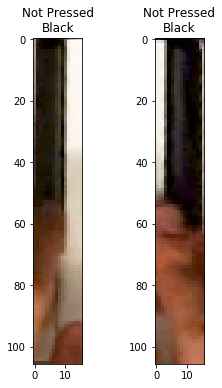

Samples from X_test: 


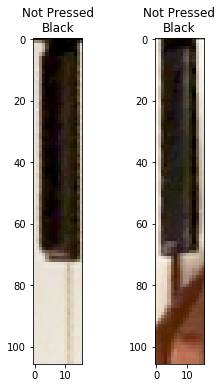

Samples from X_val: 


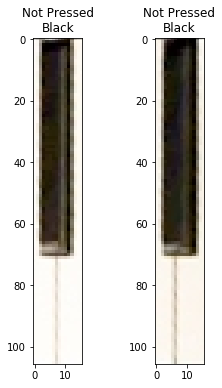

In [4]:
# print several images with labels

for _type in ['train', 'test', 'val']:

    print(f'Samples from X_{_type}: ')

    fig, axarr = plt.subplots(1, 2, figsize=[4, 6])

    for i in range(0, 2):
        _, imgb, _, noteb = dataset.get_sample(_type, method=0)
        idx = np.random.randint(len(imgb))
        axarr[i].imshow(imgb[idx])
        axarr[i].set_title(visualize_keys(noteb[idx]) + '\nBlack')

    plt.show()

In [5]:
bmodel.train(dataset, batch_size=32, num_epochs=10,
                     learning_rate=1e-3,
                     best_path='keypress_recognition/best_black_model.tar',
                     current_path='keypress_recognition/current_black.tar',
                     method=0, key_type='black')

Epoch 1/10


IntProgress(value=0)

train Loss: 0.3823
Precision: 0.01
Recall   : 0.01


IntProgress(value=0, max=10)

val Loss: 0.7626
Precision: 0.00
Recall   : -1.00
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 2/10


IntProgress(value=0)

KeyboardInterrupt: 

In [ ]:
_, Xb, _, yb = dataset.get_sample('train', method=0)
plt.imshow(Xb[0])

Xb = np.transpose(np.array(Xb), (0, 3, 1, 2))
yb_pred = bmodel.evaluate(torch.Tensor(Xb).cuda())[0]
print("Ground Truth:", yb[0])
print("Predict:     ", visualize_keys(yb_pred))

plt.show()